# Feature Selection Notes

> https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

> https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## Some Common Feature Selection Methods

- Univariate Selection
- Feature Importance
- Correlation Matrix with Heatmap
- PCA 

## Univariate Selection

Univariate Selection makes use of the $chi^2$ statistical test to get a correlation for each feature as the scoring function and select the and selects the top $k$ best features based on that

To run a Univariate Selection we need to do the following:

### 1. Import `SelectKBest` and `chi2`

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 2. Read in the data

In [18]:
DATA_FILE = 'sample-data/mobile-price-classification/train.csv'

In [19]:
uv_data = pd.read_csv(DATA_FILE)

In [20]:
uv_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 3. Run the `SelectKBest` function with the `chi2` scoring function

In [5]:
uv_x = uv_data.iloc[:, 0:20] # Read in the first 20 columns
uv_y = uv_data.iloc[:, -1]   # Read in the last column

In [6]:
feature_count = 10                   # Number of features we want to select

scores = SelectKBest(score_func=chi2, k = 'all').fit(uv_x, uv_y).scores_

df_fit  = pd.DataFrame(scores)        # Scores as DF
df_cols = pd.DataFrame(uv_x.columns)  # Column names as DF

df_scores = pd.concat([df_cols, df_fit], axis=1)
df_scores.columns = ['Feature', 'Score']

df_scores.nlargest(feature_count, 'Score')

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In the above result higher values indicate a stronger correlation of the Feature ($x$) to the Target ($y$)

## Feature Selection

Feature selection in something built into most Tree Classifiers, this provides the weighting of each feature in the data relevant to the target

To do this you can use the following:

### 1. Import `ExtraTreesClassifier` and `Pyploy`

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

### 2. Read in the Data

In [8]:
fs_data = pd.read_csv(DATA_FILE)
fs_x = fs_data.iloc[:,0:20] 
fs_y = fs_data.iloc[:,-1]    

In [9]:
fs_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 3. Train the Classifier

In [10]:
classifier = ExtraTreesClassifier()  # Create classifier instance
classifier.fit(fs_x, fs_y)           # Train the Classifier 

fs_importance = classifier.feature_importances_

print(fs_importance)

[0.06577645 0.01986191 0.03139422 0.01778105 0.02994948 0.01763909
 0.03621337 0.03302762 0.03475033 0.03077129 0.0324249  0.04390197
 0.0482759  0.40936271 0.03245077 0.0330587  0.03343866 0.0142329
 0.01559542 0.02009326]


### 4. Map the Importances to Column Names

In [11]:
df_importance = pd.Series(fs_importance, index=fs_x.columns)
df_importance.nlargest

<bound method Series.nlargest of battery_power    0.065776
blue             0.019862
clock_speed      0.031394
dual_sim         0.017781
fc               0.029949
four_g           0.017639
int_memory       0.036213
m_dep            0.033028
mobile_wt        0.034750
n_cores          0.030771
pc               0.032425
px_height        0.043902
px_width         0.048276
ram              0.409363
sc_h             0.032451
sc_w             0.033059
talk_time        0.033439
three_g          0.014233
touch_screen     0.015595
wifi             0.020093
dtype: float64>

### 5. Plot the Importances

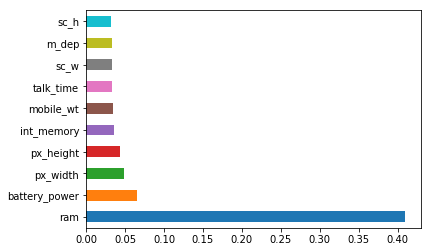

In [12]:
df_importance.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

A correlation matrix will allow us to view how well (positively or negatively) a specific feature influences the target result

### 1. Import Dependencies

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2. Read in Data

In [14]:
cm_data = pd.read_csv(DATA_FILE)

cm_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
cm_x = cm_data.iloc[:,0:20] # Extract feature columns
cm_y = cm_data.iloc[:,-1]   # Extract target column

### 3. Get the Correlation Matrix

In [16]:
correlation_matrix = cm_data.corr()

correlation_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### 4. Plot Heatmap

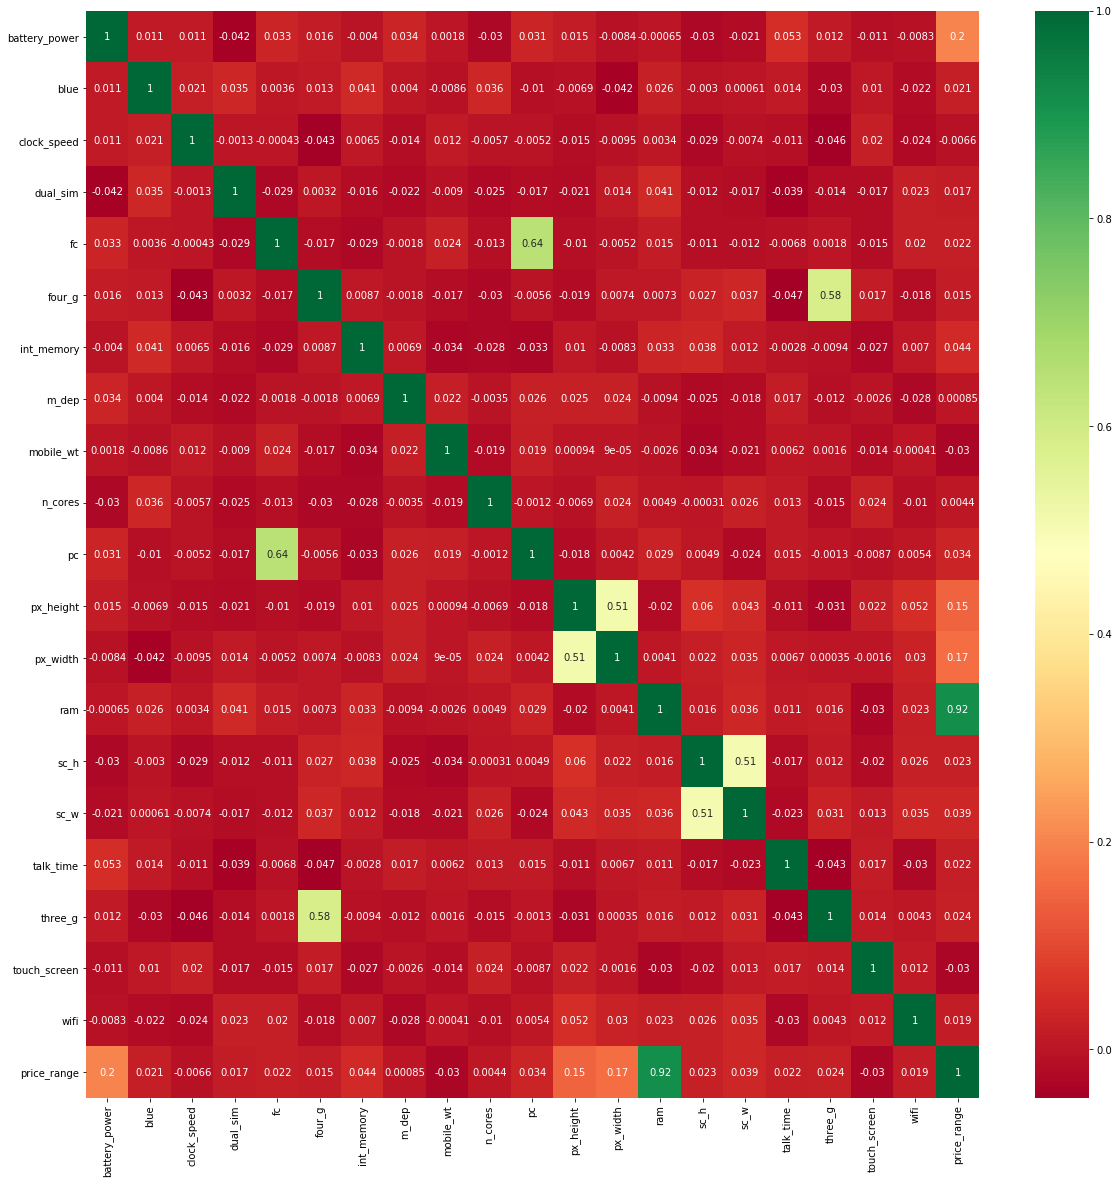

In [17]:
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(20,20))

_ = sns.heatmap(cm_data[top_correlation_features].corr(), annot=True, cmap="RdYlGn")

From the above we have the correlations between the different features at the intersections of the columns. A higher number indicates a stronger correlation between fields. In our case we are looking a the `price_range` column, here we can see the correlations between `ram`, `px_height`, `px_width` and `battery_power` are apparent